# Introduction to Augmentation and Model Evaluation

In this notebook, we explore the impact of data augmentation techniques on the performance of different deep learning architectures for image classification. Data augmentation is a crucial step in modern machine learning workflows, particularly for handling class imbalances, improving model generalization, and mitigating overfitting. We evaluated three distinct models using a structured experimental design to understand how augmentation influences model performance. 

## Models Evaluated:
1. **Multi-Layer Perceptron (MLP)**: A simple feedforward neural network that serves as a baseline.
2. **Convolutional Neural Network (CNN)**: A well-established model for image-based tasks due to its ability to capture spatial hierarchies in data.
3. **Vision Transformer (ViT)**: A modern architecture leveraging self-attention mechanisms, tested here with a frozen backbone.

## Experimental Setup:
Each model was trained and evaluated under three augmentation strategies:
1. **No Augmentation**: A baseline setup with the original dataset.
2. **Augmentation Pass 1 Time (x2)**: The dataset size was doubled using a range of transformations applied once.
3. **Augmentation with Class Balancing**:
   - **Oversampling**: Increased the size of the underrepresented class by **+50%**.
   - **Undersampling**: Reduced the size of the overrepresented class by **-5%**.
   - Applied transformations similar to those in strategy 2.

In order to reproduce you can run the following:

In [ ]:
!python MammoNet/main.py

## Data Augmentation Pipeline:
We employed an augmentation pipeline inspired by state-of-the-art methods, implemented using the `albumentations` library. Key transformations included:
- **Flips**: Horizontal and vertical.
- **Affine Transformations**: Scaling, rotation, and perspective distortions.
- **Noise and Blurring**: Gaussian noise, motion blur, and sharpen filters.
- **Color Adjustments**: Brightness, contrast, hue, and saturation modifications.
- **Advanced Techniques**: Elastic transforms, superpixel segmentation, and other geometric distortions.

This pipeline introduces variability to the dataset while preserving critical features necessary for classification.

In [18]:
import os
os.chdir('..')
os.getcwd()

'c:\\Users\\ismyn\\UNI\\FU Berlin\\Life Sciences\\Sheet2\\MammoNet'

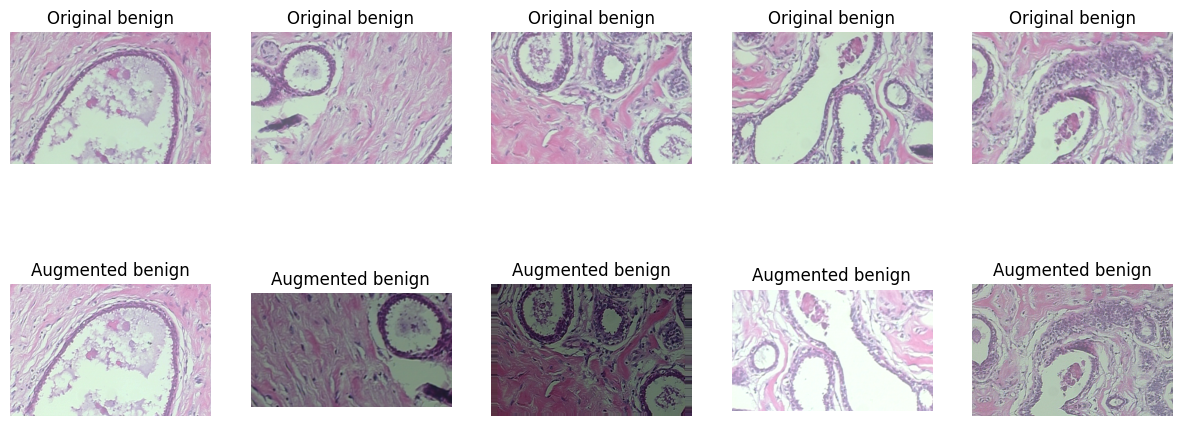

In [19]:
import numpy as np
from PIL import Image

from MammoNet.dataset.data_handler import DataHandler
from MammoNet.dataset.dataset import HistologyDataset
from MammoNet.dataset.image_augmentations import ImageAugmentations

data_handler = DataHandler()
my_data = data_handler.read_full_dataset()
paths, labels, sublabels, resolutions = my_data
explore_dataset = HistologyDataset(paths, labels)

image_paths = paths[:5]
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, path, label in zip(axes[0], image_paths, labels[:5]):
    ax.imshow(plt.imread(path))
    ax.axis('off')
    ax.set_title('Original '+ str(label))

images = [Image.open(image_path) for image_path in image_paths]
img_arrays = [np.array(img) for img in images]
augmenter = ImageAugmentations()

for ax, img_array, label in zip(axes[1], img_arrays, labels[:5]):
    ax.imshow(augmenter(img_array))
    ax.axis('off')
    ax.set_title('Augmented '+ str(label))


## Evaluation Metrics:
To assess the models' performance across these strategies, we calculated the following metrics:
- **Accuracy**: The ratio of correct predictions to total predictions.
- **Precision**: The proportion of true positives among predicted positives.
- **Recall**: The proportion of true positives among actual positives.
- **F1-Score**: The harmonic mean of precision and recall.
- **AUC Score**: The area under the Receiver Operating Characteristic (ROC) curve.
- **Confusion Matrices**: Visual representations of classification results, emphasizing misclassifications.

## Objective:
This notebook aims to provide insights into the following:
1. How different augmentation strategies impact model performance across diverse architectures.
2. The effectiveness of oversampling and undersampling in addressing class imbalances.
3. The relative strengths and weaknesses of MLP, CNN, and ViT under varying augmentation conditions.

By systematically evaluating these factors, we aim to identify best practices for integrating augmentation into training pipelines, especially in imbalanced datasets.

To run evaluation:


In [ ]:
!python MammoNet/evaluate/evaluate_models.py

___
Trained models can be found at: https://drive.google.com/drive/folders/1vJ05bo915b_LeX4YvCCE9qO8459xf9NA?usp=drive_link

Full repo: https://github.com/ja-nina/MammoNet/

___

# Results

In [7]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


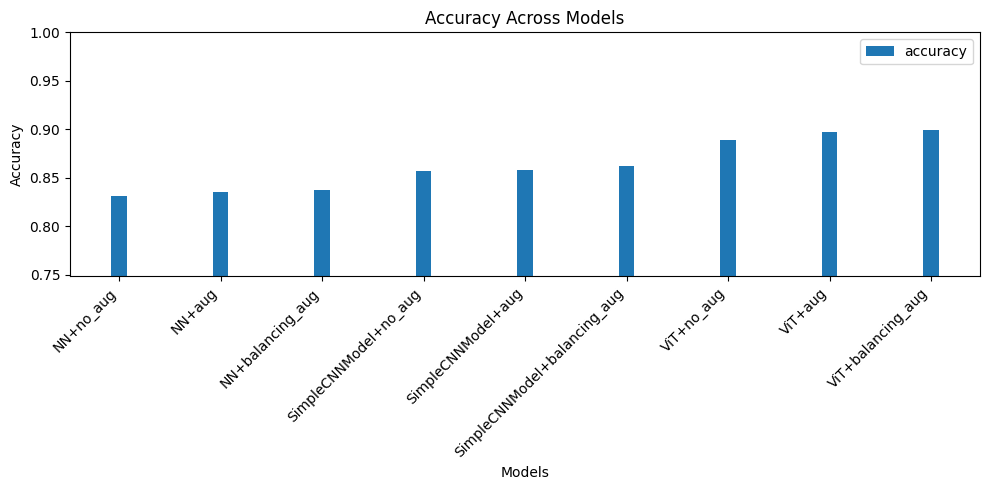

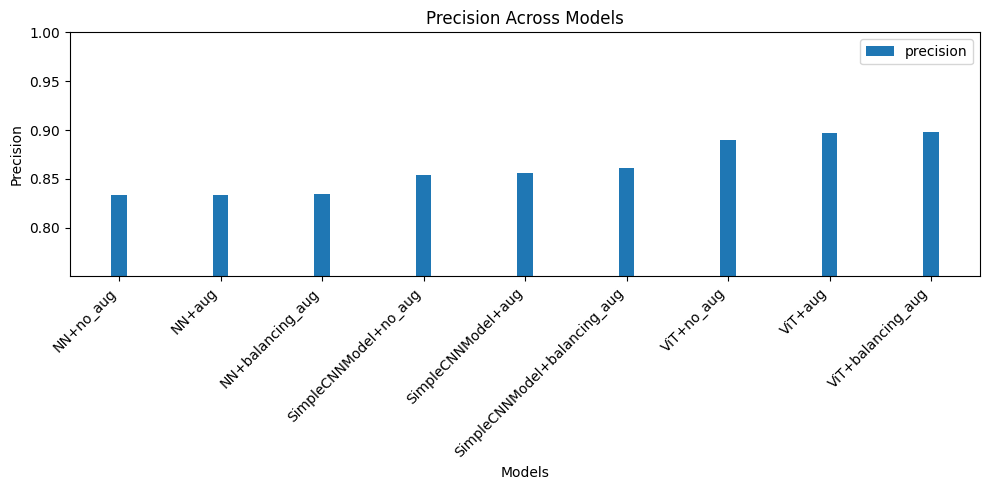

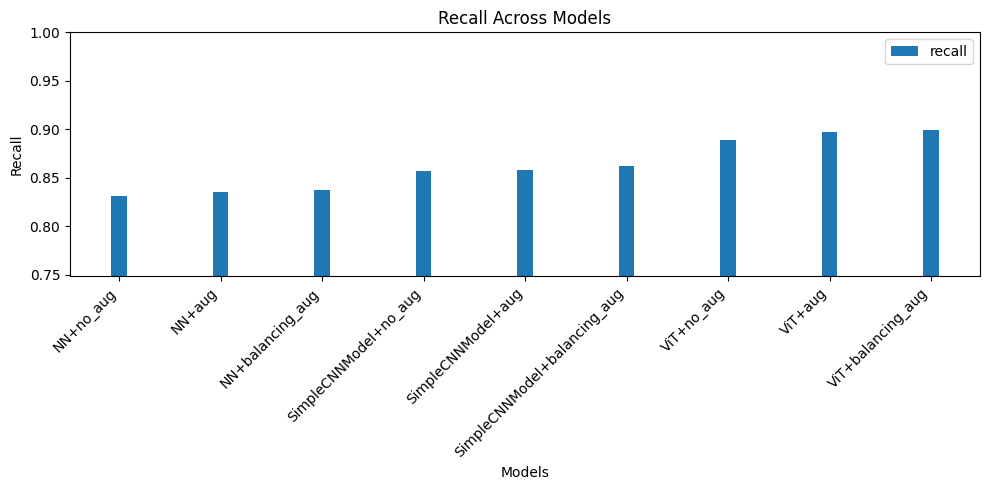

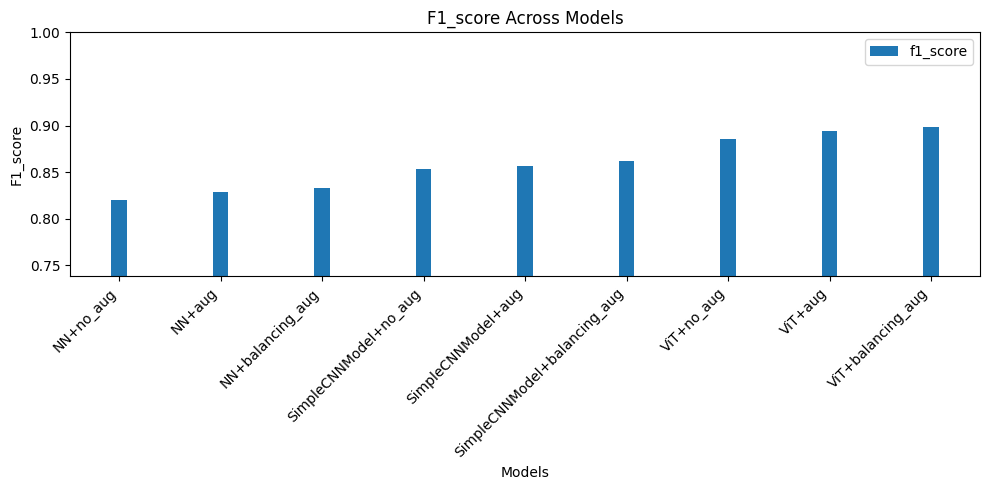

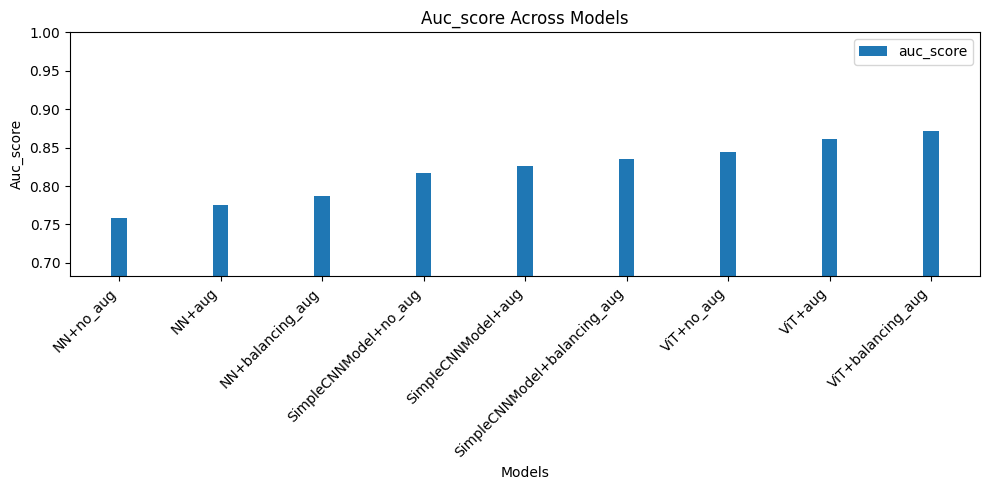

In [8]:

with open("C:/trained_models/results_new.json", 'r') as file:
    data = json.load(file)

models = []
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_score']
confusion_matrices = []

for item in data:
    path_model = item["path_model"]
    metrics = item["metrics"]
    
    model_name = path_model.replace("_with", "").split("\\")[-1].split(".")[0]
    prefix, suffix = model_name.split("_", 1)
    new_prefix = prefix.replace("SimpleNNModel", "NN").replace("SimpleCNNModel", "SimpleCNNModel").replace("VisionTransformerModel", "ViT")
    renamed_model = f"{new_prefix}+{suffix}"
    
    models.append({
        "name": renamed_model,
        **{metric: metrics[metric] for metric in metrics_to_plot}
    })
    confusion_matrices.append(metrics['confusion_matrix'])

x_labels = [model['name'] for model in models]
x = np.arange(len(models))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    plt.figure(figsize=(10, 5))
    values = [model[metric] for model in models]
    sorted_pairs = sorted(zip(values, x_labels))
    sorted_values, sorted_x_labels = zip(*sorted_pairs)
    
    plt.bar(sorted_x_labels, sorted_values, width, label=metric)
    plt.ylim(min(values)*0.9, 1)
    plt.xticks(sorted_x_labels, x_labels, rotation=45, ha='right')
    plt.title(f'{metric.capitalize()} Across Models')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Models')
    plt.legend()
    plt.tight_layout()
    plt.show()



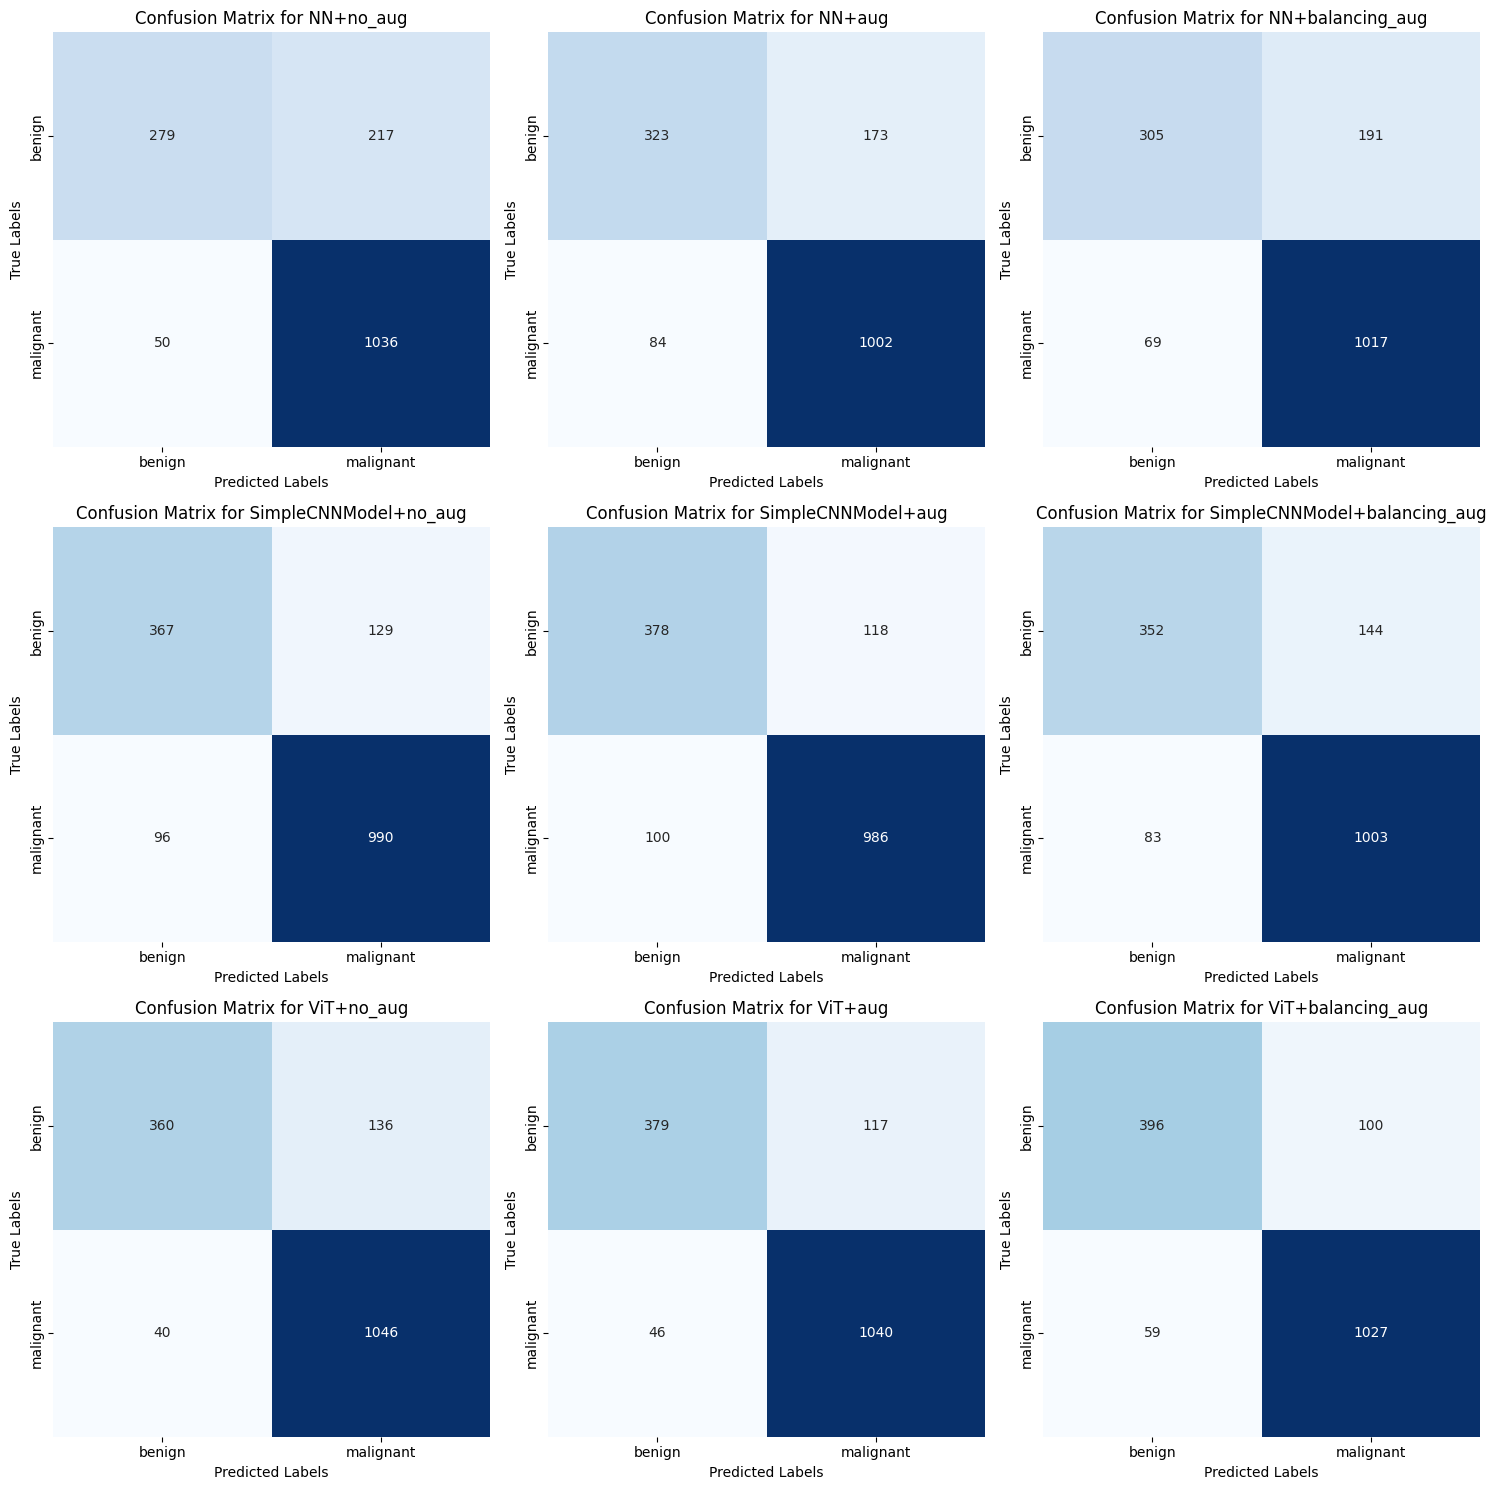

In [ ]:


def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels(['benign', 'malignant'])
    ax.set_yticklabels(['benign', 'malignant'])

num_matrices = len(confusion_matrices)
num_cols = (num_matrices + 2) // 3  # Ensure at least 2 rows

fig, axes = plt.subplots(3, num_cols, figsize=(15, 15))

for i, cm in enumerate(confusion_matrices):
    row = i // num_cols
    col = i % num_cols
    plot_confusion_matrix(cm, x_labels[i], axes[row, col])
    
for j in range(num_matrices, 3 * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()